In [120]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import zipfile

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [121]:
vestiaire_path = '/Users/acadiagrenier/Desktop/FallFiles.2024/DNSC4211/vestiaire.csv.zip'

In [122]:
#-- Used to load zip onto local host: https://unc-libraries-data.github.io/Python/Files_Packages/Files_Packages.html
with zipfile.ZipFile(vestiaire_path, 'r') as zip_ref:
    vestiaire_df = zip_ref.namelist()[0] 
    with zip_ref.open(vestiaire_df) as vestiaire_df:
        vestiaire_data = pd.read_csv(vestiaire_df)


In [123]:
#-- I am trying to convey to Vestiaire Stakeholders that they need to leverage two things:
# 1. What products are preferred by customers, that way they can target specific brands/item types to increase revenue
# 2. And that by selling high quality products that match consumer wants, Vestiaire can help reduce textile waste among the most wasteful class, better acheiving their goal of sustainable fashion

In [124]:
#1. Cleaning

In [125]:
vestiaire_data.head(5)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,brand_url,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge,has_cross_border_fees,buyers_fees,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,http://vestiairecollective.com/miu-miu/,Wool,Grey,272.92,223.65,216.94,Common,NaN,NaN,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,161,Barbara Bui,http://vestiairecollective.com/barbara-bui/,Cotton,Navy,127.80,106.50,106.50,Common,True,21.30,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,False,False,True,False,False,391,Comme Des Garcons,http://vestiairecollective.com/comme-des-garcons/,Wool,White,1278.00,1065.00,926.55,Expert,True,213.00,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,False,False,True,False,False,2797,MSGM,http://vestiairecollective.com/msgm/,Polyester,Black,163.90,149.00,126.65,Expert,True,14.90,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,11956,LVIR,http://vestiairecollective.com/lvir/,Vegan leather,Black,119.72,99.77,83.55,Common,True,19.95,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [126]:
#Checked to see the data quality -- Missing data = 20.51%
(vestiaire_data.isna().mean() * 100).sum()

20.50850958452617

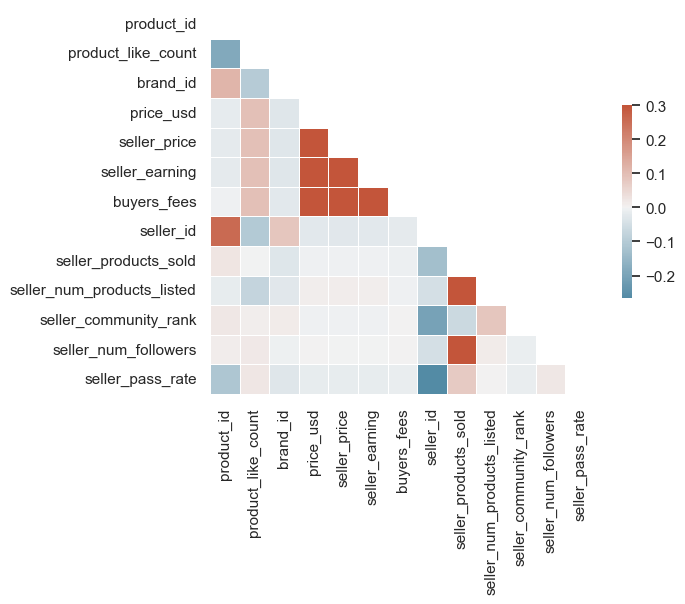

In [127]:
import pandas as pd 
from string import ascii_letters

#--Only used numeric columns,  structure from class 9
#-- corr. is as expected, positively crrelated items make sense, didn't flag anything
vest_num = vestiaire_data.select_dtypes(include=[float, int])
sns.set_theme(style="white")
corr = vest_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [128]:
#900514 rows × 36 columns
pd.set_option('display.max_columns', None)
vestiaire_data

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,brand_url,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge,has_cross_border_fees,buyers_fees,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,http://vestiairecollective.com/miu-miu/,Wool,Grey,272.92,223.65,216.94,Common,NaN,NaN,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,161,Barbara Bui,http://vestiairecollective.com/barbara-bui/,Cotton,Navy,127.80,106.50,106.50,Common,True,21.30,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,False,False,True,False,False,391,Comme Des Garcons,http://vestiairecollective.com/comme-des-garcons/,Wool,White,1278.00,1065.00,926.55,Expert,True,213.00,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,False,False,True,False,False,2797,MSGM,http://vestiairecollective.com/msgm/,Polyester,Black,163.90,149.00,126.65,Expert,True,14.90,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,11956,LVIR,http://vestiairecollective.com/lvir/,Vegan leather,Black,119.72,99.77,83.55,Common,True,19.95,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900509,41538360,Glitter trainers,Glitter trainers Bally Gold size 38 EU in Glit...,"Bally Vita Parcours sneakers. PPleather, suede...",Bally Glitter Trainers,Women,Women Shoes,All seasons,Good condition,1.0,False,False,True,False,False,290,Bally,http://vestiairecollective.com/bally/,Glitter,Gold,89.46,74.55,60.71,Expert,True,14.91,Tourcoing,8849230,lauragua,1-2 days,Italy,40.0,17.0,391778.0,104.0,100.0
900510,41532271,Leather heels,Leather heels Casadei Black size 38.5 EU in Le...,Trendy and classic Casadei high-heel pumps Mad...,Casadei Leather Heels,Women,Women Shoes,All seasons,Good condition,1.0,False,False,True,False,False,1053,Casadei,http://vestiairecollective.com/casadei/,Leather,Black,153.36,127.80,108.63,Expert,True,25.56,Tourcoing,5448248,bettina5448248,1-2 days,Austria,26.0,99.0,51408.0,75.0,89.0
900511,41538140,Leather cowboy boots,Leather cowboy boots Ash Black size 36 EU in L...,Very good quality leather boots Worn once Elas...,Ash Leather Boots,Women,Women Shoes,All seasons,Very good condition,0.0,False,False,True,False,False,206,Ash,http://vestiairecollective.com/ash/,Leather,Black,191.70,159.75,138.98,Common,True,31.95,Tourcoing,9347694,sylvie9347694,NaN,France,0.0,2.0,0.0,3.0,0.0
90051

In [129]:
print(vestiaire_data.columns)

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')


In [130]:
#Removing unnecessary variables that don't impact my analysis

#certain columns contain inconsistent data, the descriptive columns are inconsistent as the seller is coming up with them
#NOT a Vestiaire standardzied description
vestiaire_data = vestiaire_data.drop(columns=['product_id', 'product_description','product_name','product_keywords','product_gender_target','product_season','available','in_stock','should_be_gone','brand_url','product_color','price_usd','seller_earning','seller_badge','has_cross_border_fees','warehouse_name','seller_id','seller_username','usually_ships_within','seller_country','seller_products_sold','seller_num_products_listed','seller_community_rank','seller_num_followers','reserved','seller_pass_rate'])

In [131]:
vestiaire_data.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees
0,Wool mini skirt,Women Clothing,Never worn,34.0,True,117,Miu Miu,Wool,223.65,NaN
1,Jacket,Women Clothing,Very good condition,1.0,False,161,Barbara Bui,Cotton,106.50,21.30
2,Wool coat,Women Clothing,Very good condition,2.0,False,391,Comme Des Garcons,Wool,1065.00,213.00
3,Mini skirt,Women Clothing,Very good condition,0.0,False,2797,MSGM,Polyester,149.00,14.90
4,Vegan leather trousers,Women Clothing,Very good condition,1.0,False,11956,LVIR,Vegan leather,99.77,19.95


In [132]:
#First I found most purchased brands, product types, quality, and materials
#Goal is to find which ones generate the most sales and then find what brands sell the most inventory
#Gives insight into preferences and products to increase inventory of

In [133]:
vestiaire_data['sold'] = vestiaire_data['sold'].astype(int)

In [134]:
vestiaire_data.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees
0,Wool mini skirt,Women Clothing,Never worn,34.0,1,117,Miu Miu,Wool,223.65,NaN
1,Jacket,Women Clothing,Very good condition,1.0,0,161,Barbara Bui,Cotton,106.50,21.30
2,Wool coat,Women Clothing,Very good condition,2.0,0,391,Comme Des Garcons,Wool,1065.00,213.00
3,Mini skirt,Women Clothing,Very good condition,0.0,0,2797,MSGM,Polyester,149.00,14.90
4,Vegan leather trousers,Women Clothing,Very good condition,1.0,0,11956,LVIR,Vegan leather,99.77,19.95


In [135]:
total_brand_count = vestiaire_data.groupby('brand_name').size().sort_values(ascending=False)
print(total_brand_count)

brand_name
Gucci              41009
Burberry           24018
Dolce & Gabbana    22024
Prada              20972
Hermès             18711
                   ...  
KANTIS                 1
Sevan Bicakci          1
KLEINFELD              1
Kaaskas                1
Ølaf                   1
Length: 8884, dtype: int64


In [136]:
sold_products = vestiaire_data[vestiaire_data['sold'] == 1]
brand_counts = sold_products['brand_name'].value_counts()
brand_counts

brand_name
Gucci            853
Prada            527
Hermès           348
Burberry         338
Chanel           329
                ... 
Rozae Nichols      1
Wicked Weasel      1
Neve & Noor        1
Dodo Bar Or        1
Ninamounah         1
Name: count, Length: 1461, dtype: int64

In [137]:
#knowing Gucci is the most purchased brand, I wanted to find the % sold of total inventory to see if that metric is from popularity, or because gucci has the largest inventory
#Used the same strategy my group used in ASSN4
total_counts = vestiaire_data.groupby('brand_name').size()
brand_counts = sold_products['brand_name'].value_counts()

selling_rate = brand_counts / total_counts
selling_rate = selling_rate.fillna(0)
selling_rate = selling_rate.reset_index(name='Selling Rate')

selling_rate = selling_rate.sort_values(by='Selling Rate', ascending=False)
selling_rate

,brand_name,Selling Rate
2895,Freda Banana,1.0
3749,It's All About Romance,1.0
8728,ZEUS+DIONE,1.0
8738,Zanini,1.0
3875,James Smith & Sons,1.0
...,...,...
3242,Griffin,0.0
3241,Greymer,0.0
3240,Grey Mer,0.0
3239,Grey Ant,0.0


In [138]:
#I wanted to find the CI for each rate, but all the strategies I tried wouldn't work--I think because there are too many brands with too little data
#now i am going to only use the top 25 brands

In [139]:
#Most sold brands
sold_products = vestiaire_data[vestiaire_data['sold'] == 1]
brand_counts = sold_products['brand_name'].value_counts()
top_25_brands = brand_counts.nlargest(25)

print(top_25_brands.index)

Index(['Gucci', 'Prada', 'Hermès', 'Burberry', 'Chanel', 'Louis Vuitton',
       'Balenciaga', 'Dolce & Gabbana', 'Christian Louboutin', 'Saint Laurent',
       'Valentino Garavani', 'Dior', 'Versace', 'Polo Ralph Lauren',
       'Alexander McQueen', 'Adidas', 'Celine', 'Bottega Veneta', 'Jimmy Choo',
       'Miu Miu', 'Sandro', 'Golden Goose', 'Fendi', 'Acne Studios',
       'Dsquared2'],
      dtype='object', name='brand_name')


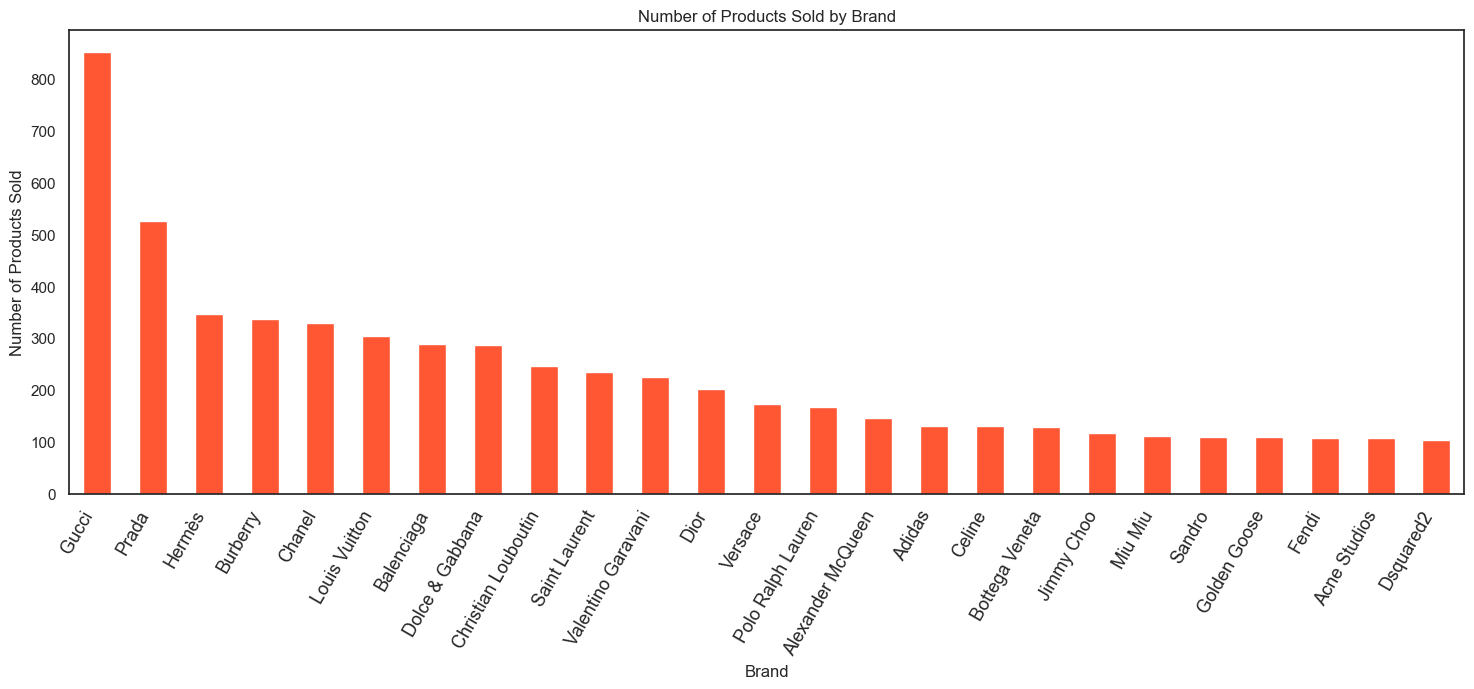

In [140]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
top_25_brands = brand_counts.nlargest(25)
top_25_brands.plot(kind='bar', color='#FF5733') 
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Brand')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [141]:
#Create a column that indicates top brands, allows me to clean out all the smaller brands with less data, makes my data less noisy
top_25_brands = ['Gucci', 'Prada', 'Hermès', 'Burberry', 'Chanel', 'Louis Vuitton',
                 'Balenciaga', 'Dolce & Gabbana', 'Christian Louboutin', 'Saint Laurent',
                 'Valentino Garavani', 'Dior', 'Versace', 'Polo Ralph Lauren',
                 'Alexander McQueen', 'Adidas', 'Celine', 'Bottega Veneta', 'Jimmy Choo',
                 'Miu Miu', 'Sandro', 'Golden Goose', 'Fendi', 'Acne Studios',
                 'Dsquared2']

vestiaire_data['top_25_brand'] = vestiaire_data['brand_name'].isin(top_25_brands).astype(int)

In [142]:
#Same steps but for product type
sold_products = vestiaire_data[vestiaire_data['sold'] == 1]
sold_item = sold_products['product_type'].value_counts()
sold_item

product_type
T-shirt                            574
Leather flats                      376
Leather heels                      374
Shirt                              371
Jacket                             346
                                  ... 
Daymaster leather high trainers      1
Track leather high trainers          1
SL/06 leather low trainers           1
Clipper leather low trainers         1
Shox leather trainers                1
Name: count, Length: 1646, dtype: int64

In [143]:
sold_products = vestiaire_data[vestiaire_data['sold'] == 1]
sold_item = sold_products['product_type'].value_counts()
sold_by_item = sold_item.nlargest(25)

print(sold_by_item.index)

Index(['T-shirt', 'Leather flats', 'Leather heels', 'Shirt', 'Jacket',
       'Sunglasses', 'Mid-length dress', 'Sweatshirt', 'Leather trainers',
       'Leather boots', 'Trousers', 'Leather low trainers', 'Maxi dress',
       'Silk tie', 'Leather sandals', 'Leather sandal', 'Leather lace ups',
       'Vest', 'Mini dress', 'Leather ballet flats', 'Leather belt',
       'Straight jeans', 'Polo shirt', 'Blouse', 'Flats'],
      dtype='object', name='product_type')


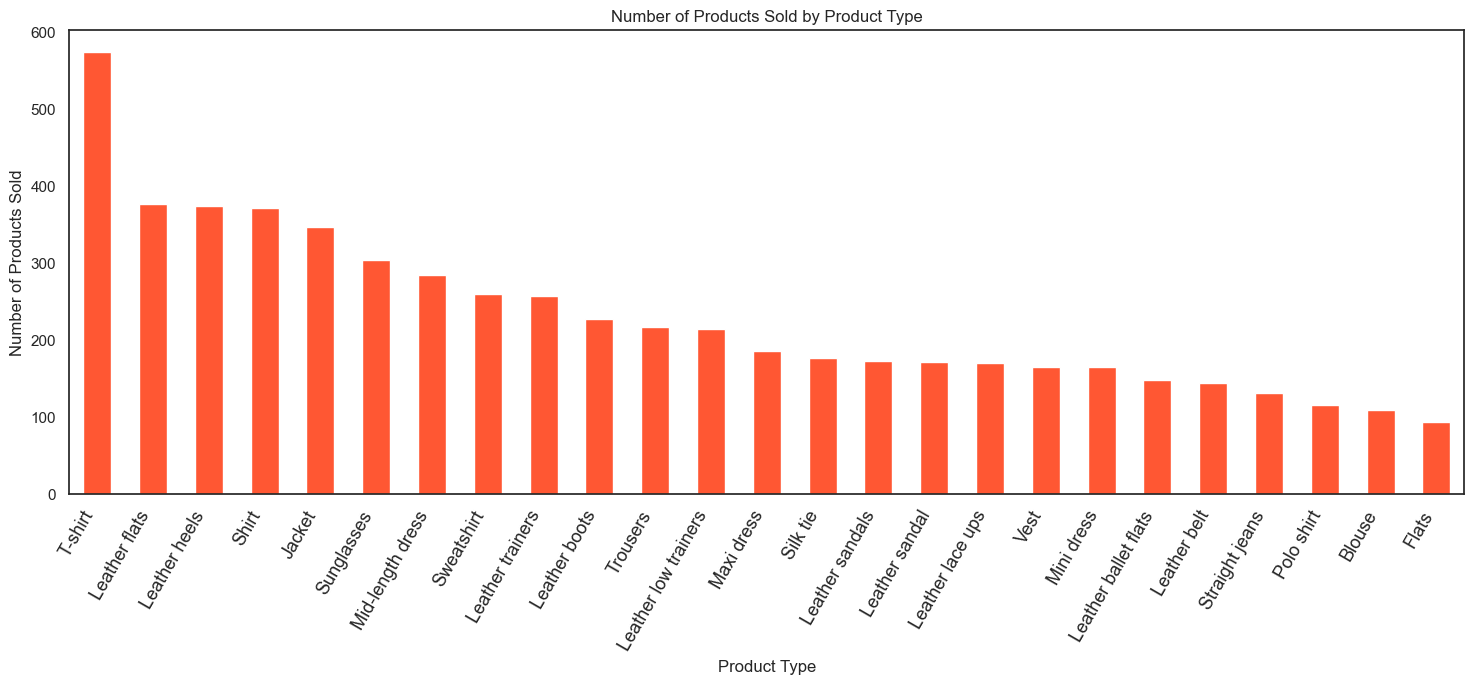

In [144]:
#Top 25 helps remove noisy variables
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
sold_by_item = sold_item.nlargest(25)
sold_by_item.plot(kind='bar', color='#FF5733') 
plt.xlabel('Product Type')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Product Type')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [145]:
sold_by_item.head(25)

product_type
T-shirt                 574
Leather flats           376
Leather heels           374
Shirt                   371
Jacket                  346
Sunglasses              303
Mid-length dress        284
Sweatshirt              259
Leather trainers        256
Leather boots           227
Trousers                216
Leather low trainers    214
Maxi dress              185
Silk tie                176
Leather sandals         172
Leather sandal          171
Leather lace ups        169
Vest                    165
Mini dress              164
Leather ballet flats    148
Leather belt            143
Straight jeans          130
Polo shirt              115
Blouse                  108
Flats                    93
Name: count, dtype: int64

In [146]:
product_material = sold_products['product_material'].value_counts()
product_material 

product_material
Leather          3971
Cotton           2841
Polyester         829
Silk              810
Wool              803
                 ... 
Silver Plated       1
Platinum            1
Raccoon             1
Sponge              1
Astrakhan           1
Name: count, Length: 61, dtype: int64

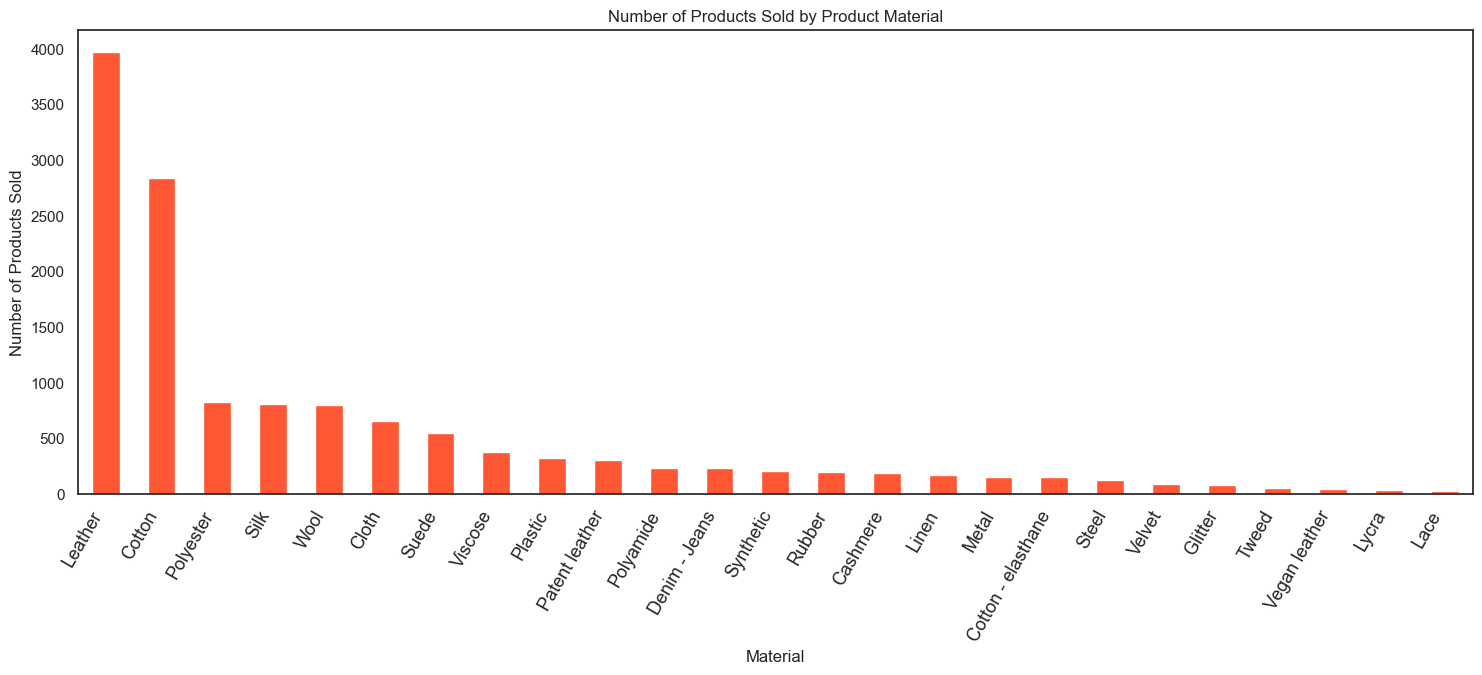

In [147]:
#same process for sold materials
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
product_material = sold_products['product_material'].value_counts()
sold_by_material = product_material.nlargest(25)
sold_by_material.plot(kind='bar', color='#FF5733') 
plt.xlabel('Material')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Product Material')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

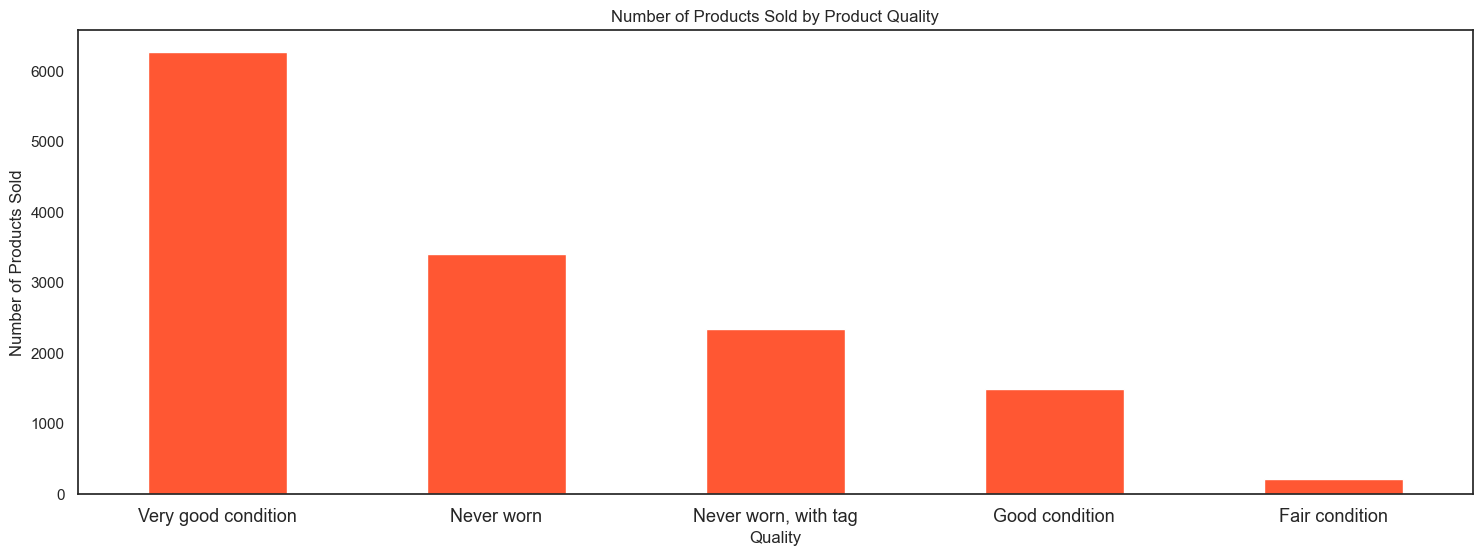

In [148]:
#same process for item quality
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
product_condition = sold_products['product_condition'].value_counts()
sold_by_quality = product_condition.nlargest(25)
sold_by_quality.plot(kind='bar', color='#FF5733') 
plt.xlabel('Quality')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Product Quality')
plt.xticks(rotation=360, ha='center', fontsize=13)
plt.show()

In [149]:
sold_by_quality.head()

product_condition
Very good condition     6268
Never worn              3413
Never worn, with tag    2339
Good condition          1498
Fair condition           218
Name: count, dtype: int64

In [150]:
top_25_products = ['T-shirt', 'Leather flats', 'Leather heels', 'Shirt', 'Jacket',
       'Sunglasses', 'Mid-length dress', 'Sweatshirt', 'Leather trainers',
       'Leather boots', 'Trousers', 'Leather low trainers', 'Maxi dress',
       'Silk tie', 'Leather sandals', 'Leather sandal', 'Leather lace ups',
       'Vest', 'Mini dress', 'Leather ballet flats', 'Leather belt',
       'Straight jeans', 'Polo shirt', 'Blouse', 'Flats']


vestiaire_data['top_25_products'] = vestiaire_data['product_type'].isin(top_25_products).astype(int)

In [151]:
#creating a new data set with top brands, and top products
vestiaire_data.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees,top_25_brand,top_25_products
0,Wool mini skirt,Women Clothing,Never worn,34.0,1,117,Miu Miu,Wool,223.65,NaN,1,0
1,Jacket,Women Clothing,Very good condition,1.0,0,161,Barbara Bui,Cotton,106.50,21.30,0,1
2,Wool coat,Women Clothing,Very good condition,2.0,0,391,Comme Des Garcons,Wool,1065.00,213.00,0,0
3,Mini skirt,Women Clothing,Very good condition,0.0,0,2797,MSGM,Polyester,149.00,14.90,0,0
4,Vegan leather trousers,Women Clothing,Very good condition,1.0,0,11956,LVIR,Vegan leather,99.77,19.95,0,0


In [152]:
vestiaire_data_bvp2 = vestiaire_data[~((vestiaire_data['top_25_brand'] == 0))]
vestiaire_data_bvp2.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees,top_25_brand,top_25_products
0,Wool mini skirt,Women Clothing,Never worn,34.0,1,117,Miu Miu,Wool,223.65,NaN,1,0
9,Wool suit jacket,Women Clothing,Very good condition,2.0,1,10,Dior,Wool,358.91,NaN,1,0
15,Top,Women Clothing,Very good condition,2.0,0,94,Burberry,Cotton,64.97,12.99,1,0
19,Trousers,Women Clothing,Very good condition,4.0,1,2,Gucci,Cotton,119.44,NaN,1,1
23,Wool skirt suit,Women Clothing,Very good condition,0.0,0,88,Valentino Garavani,Wool,99.00,9.90,1,0


In [153]:
#found strategy from: https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/#:~:text=To%20delete%20rows%20based%20on%20specific%20column%20values%20in%20a,method%20to%20remove%20those%20rows.
#This new dataset only includes the products that are of top popularity, sold, and from popular brands
columns_to_clean = ['top_25_brand', 'top_25_products']

vestiaire_data_bvp1 = vestiaire_data_bvp2[
    ~(
        ((vestiaire_data_bvp2[columns_to_clean[0]] == 0) & (vestiaire_data_bvp2[columns_to_clean[1]] == 0)) |
        ((vestiaire_data_bvp2[columns_to_clean[0]] == 1) & (vestiaire_data_bvp2[columns_to_clean[1]] == 0)) |
        ((vestiaire_data_bvp2[columns_to_clean[0]] == 0) & (vestiaire_data_bvp2[columns_to_clean[1]] == 1))
    )
]

vestiaire_data_bvp1.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees,top_25_brand,top_25_products
19,Trousers,Women Clothing,Very good condition,4.0,1,2,Gucci,Cotton,119.44,NaN,1,1
45,Mini dress,Women Clothing,"Never worn, with tag",0.0,0,174,Alexander McQueen,Viscose,692.25,138.45,1,1
73,Blouse,Women Clothing,Fair condition,0.0,0,23,Sandro,Cotton,31.18,6.24,1,1
119,Mid-length dress,Women Clothing,Never worn,4.0,0,60,Prada,Viscose,154.43,30.89,1,1
170,Jacket,Women Clothing,Very good condition,12.0,0,50,Chanel,Cotton,4473.00,894.60,1,1


In [154]:
#Rates for top companies to find what is more likely to sell

top_25_brands_inv = vestiaire_data['brand_name'].value_counts().nlargest(25)
top_25_brands_bvp2 = vestiaire_data_bvp1['brand_name'].value_counts()
selling_rate_bvp = (top_25_brands_bvp2 / top_25_brands_inv).reset_index(name='Selling Rate')
selling_rate_bvp.rename(columns={'index': 'brand_name'}, inplace=True)
selling_rate_bvp = selling_rate_bvp.sort_values(by='Selling Rate', ascending=False)

selling_rate_bvp


,brand_name,Selling Rate
11,Dsquared2,0.547862
22,Polo Ralph Lauren,0.532754
23,Prada,0.508344
10,Dolce & Gabbana,0.482519
29,Versace,0.461884
4,Bottega Veneta,0.414059
15,Gucci,0.411080
1,Adidas,0.388739
28,Valentino Garavani,0.380133
12,Fendi,0.377438


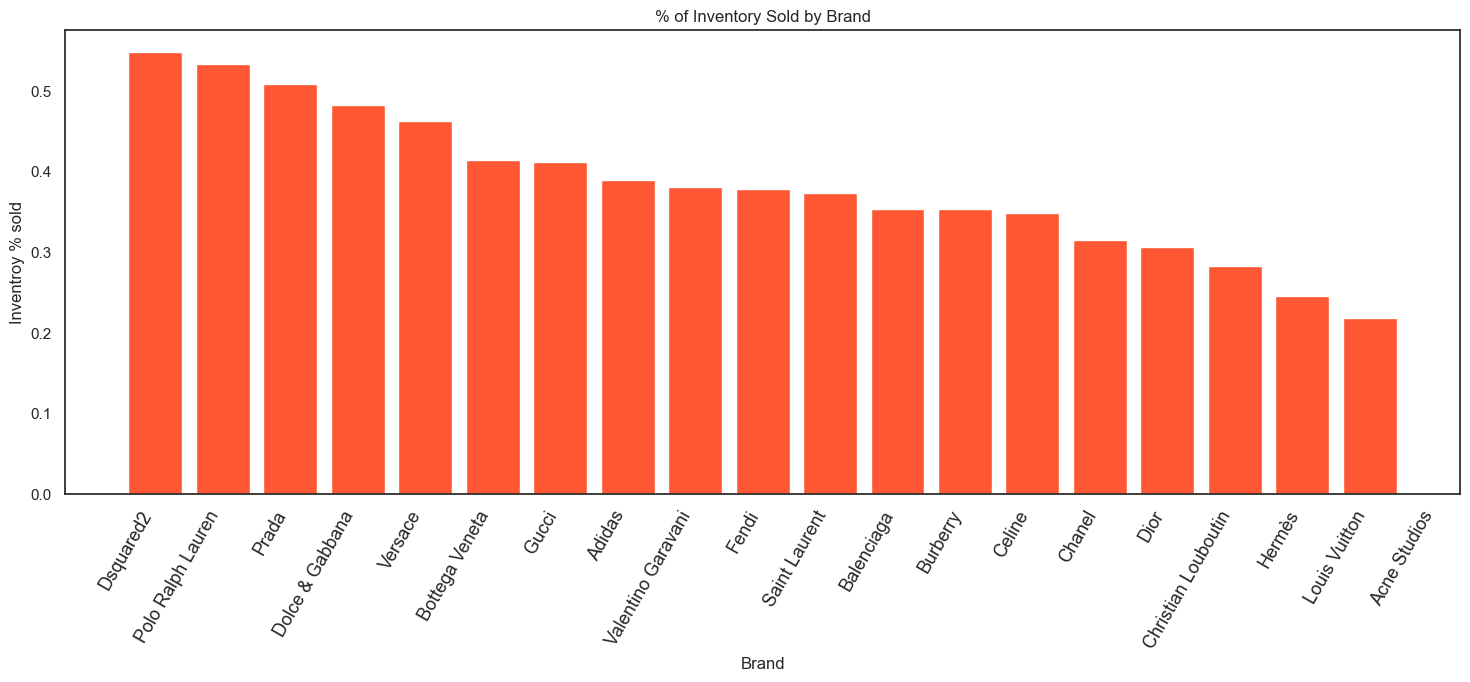

In [155]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
selling_rate_bvp = selling_rate_bvp.sort_values(by='Selling Rate', ascending=False)
plt.bar(selling_rate_bvp['brand_name'], selling_rate_bvp['Selling Rate'], color='#FF5733')
plt.xlabel('Brand')
plt.ylabel('Inventroy % sold')
plt.title('% of Inventory Sold by Brand')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [156]:
#repeat with product type
top_25_product_inv = vestiaire_data['product_type'].value_counts().nlargest(25)
top_25_product_bvp2 = vestiaire_data_bvp1['product_type'].count()

selling_rate_bvp = top_25_product_bvp2 / top_25_product_inv
selling_rate_bvp = selling_rate_bvp.reset_index(name='selling_rate')

selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
selling_rate_bvp

,product_type,selling_rate
24,Wool coat,15.524126
23,Pull,15.517689
22,Boots,15.272851
21,Straight jeans,14.567462
20,Low trainers,14.173946
19,Hat,14.106281
18,Mini dress,11.153869
17,Leather wallet,8.804673
16,Leather trainers,8.570142
15,Vest,8.132541


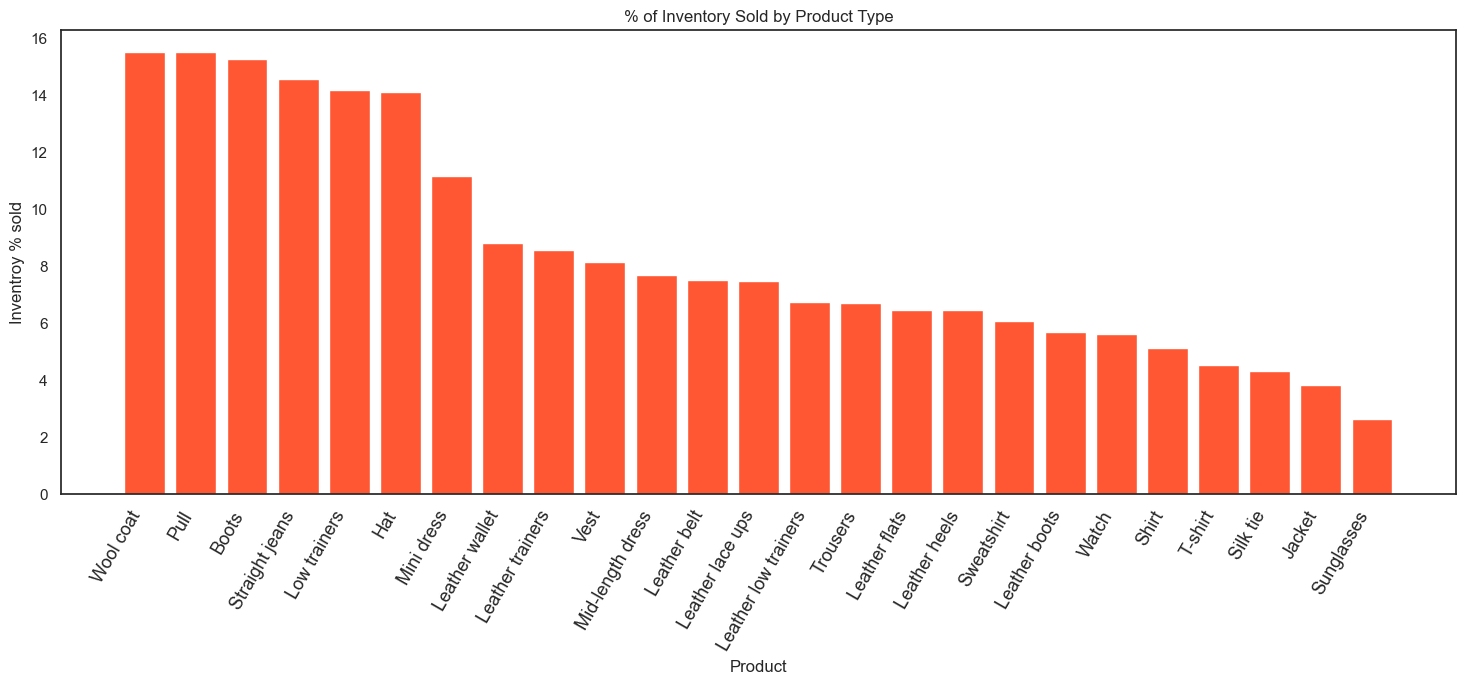

In [157]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
plt.bar(selling_rate_bvp['product_type'], selling_rate_bvp['selling_rate'], color='#FF5733')
plt.xlabel('Product')
plt.ylabel('Inventroy % sold')
plt.title('% of Inventory Sold by Product Type')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [158]:
#repeat with materials this time
top_25_materials_inv = vestiaire_data['product_material'].value_counts().nlargest(25)
top_25_materials_bvp2 = vestiaire_data_bvp1['product_material'].count()

selling_rate_bvp = top_25_materials_bvp2 / top_25_materials_inv
selling_rate_bvp = selling_rate_bvp.reset_index(name='selling_rate')

selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
selling_rate_bvp

,product_material,selling_rate
24,Silver,46.863940
23,Fur,41.327199
22,Vegan leather,37.578983
21,Glitter,32.164423
20,Velvet,21.347148
19,Linen,16.776632
18,Not specified,15.766077
17,Cotton - elasthane,14.811502
16,Denim - Jeans,11.783608
15,Rubber,11.397280


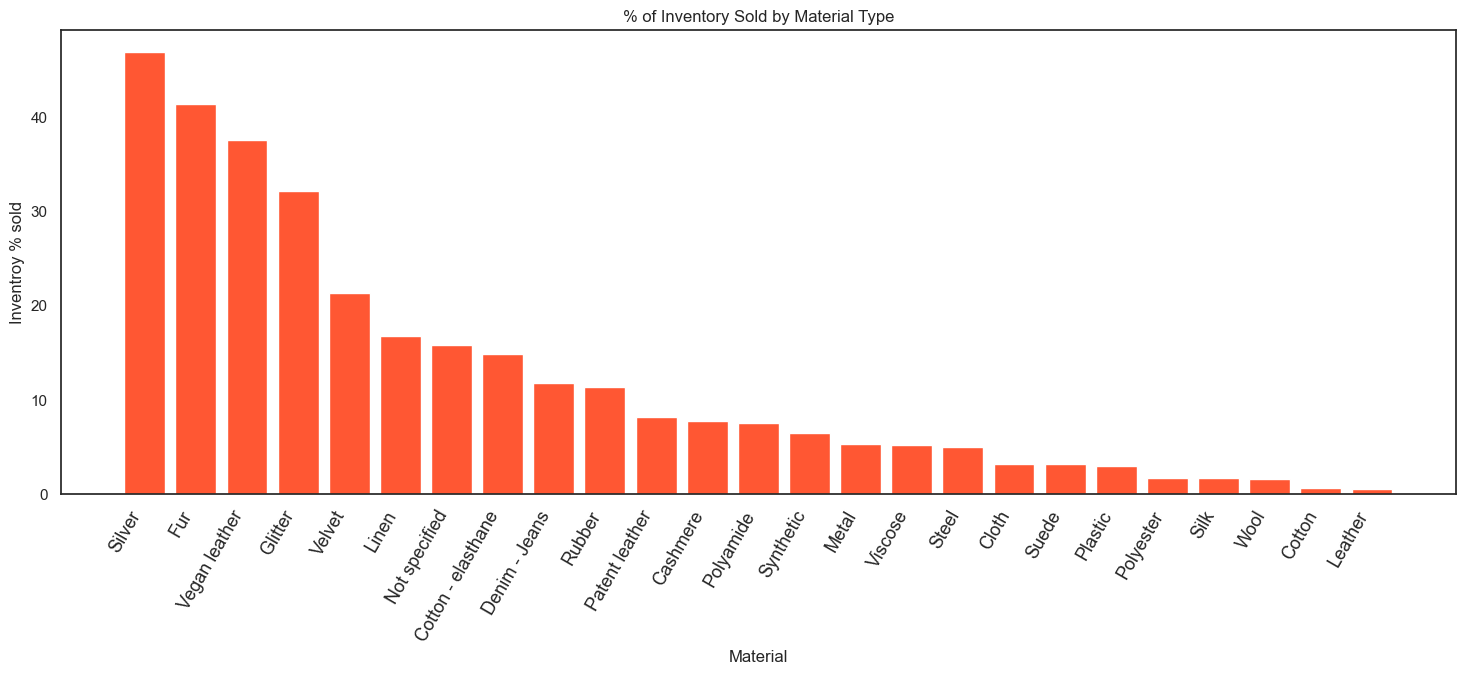

In [159]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
plt.bar(selling_rate_bvp['product_material'], selling_rate_bvp['selling_rate'], color='#FF5733')
plt.xlabel('Material')
plt.ylabel('Inventroy % sold')
plt.title('% of Inventory Sold by Material Type')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [160]:
#Repeat last time with Quality
condition_inv = vestiaire_data['product_condition'].value_counts().nlargest(25)
contdition_bvp2 = vestiaire_data_bvp1['product_condition'].count()

selling_rate_bvp = contdition_bvp2 / condition_inv
selling_rate_bvp = selling_rate_bvp.reset_index(name='selling_rate')

selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
selling_rate_bvp

,product_condition,selling_rate
4,Fair condition,4.604150
3,"Never worn, with tag",0.911990
2,Good condition,0.860126
1,Never worn,0.507356
0,Very good condition,0.279916


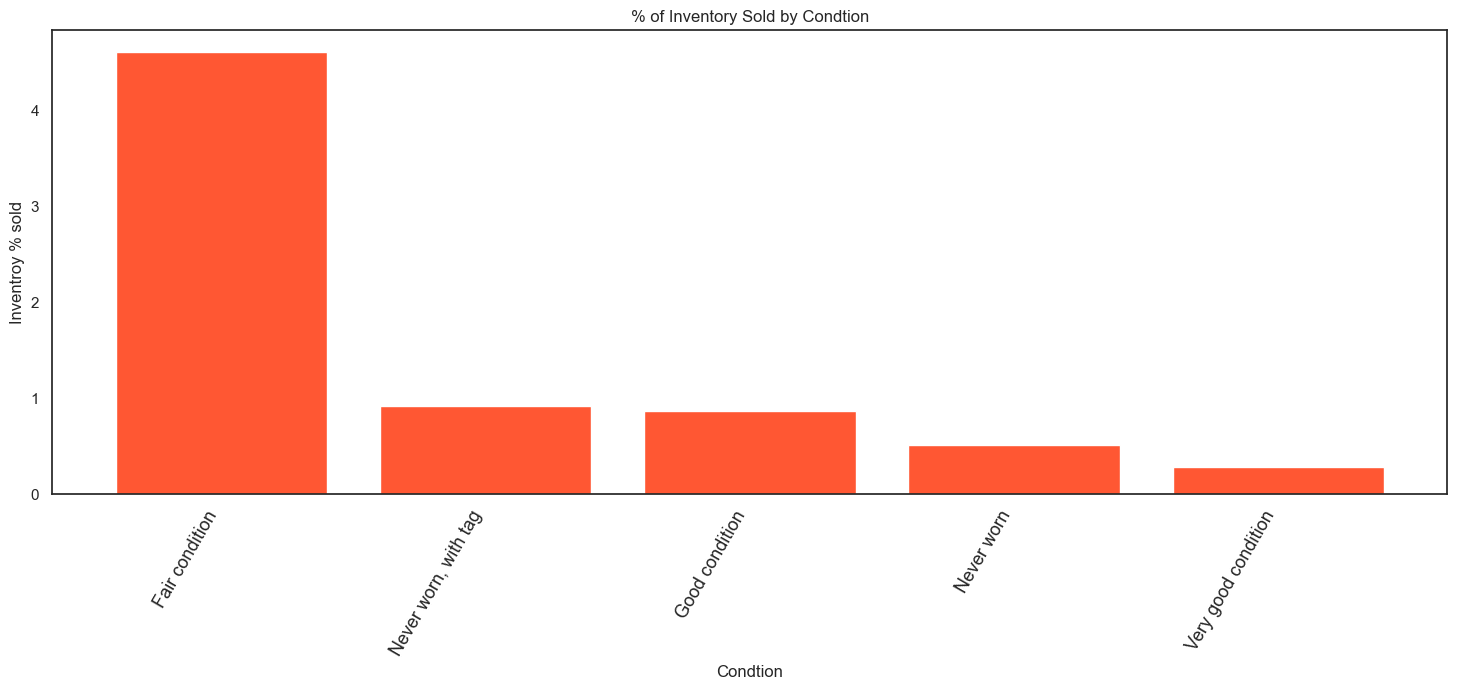

In [161]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(bottom=0.3)
selling_rate_bvp = selling_rate_bvp.sort_values(by='selling_rate', ascending=False)
plt.bar(selling_rate_bvp['product_condition'], selling_rate_bvp['selling_rate'], color='#FF5733')
plt.xlabel('Condtion')
plt.ylabel('Inventroy % sold')
plt.title('% of Inventory Sold by Condtion')
plt.xticks(rotation=60, ha='right', fontsize=13)
plt.show()

In [162]:
brand_product_pref = vestiaire_data_bvp2.groupby(['brand_name','product_type']).size()
table_bbyp = brand_product_pref.unstack(fill_value = 0)

In [163]:
#want the stacked bar chart to show the most popular items on the bottom, and least on top
total_count_by_product_type = table_bbyp.sum(axis=0)
sorted_columns = total_count_by_product_type.sort_values(ascending=False).index
table_bbyp.sort_values(by='T-shirt', ascending=False, inplace=True)
table_bbyp = table_bbyp[sorted_columns]

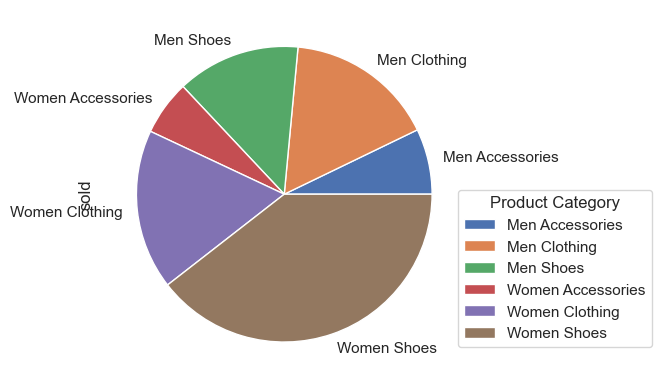

In [164]:
#I wanted more variety in my graphing as i mostly have categorical or boolean data: https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
#legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html
vestiaire_data_bvp2.groupby(['product_category']).sum().plot(kind='pie', y='sold')
plt.legend(loc="center left", bbox_to_anchor=(0.95, .3), title="Product Category")

In [165]:
#2. Target pricing and Audience class

In [166]:
vestiaire_data.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees,top_25_brand,top_25_products
0,Wool mini skirt,Women Clothing,Never worn,34.0,1,117,Miu Miu,Wool,223.65,NaN,1,0
1,Jacket,Women Clothing,Very good condition,1.0,0,161,Barbara Bui,Cotton,106.50,21.30,0,1
2,Wool coat,Women Clothing,Very good condition,2.0,0,391,Comme Des Garcons,Wool,1065.00,213.00,0,0
3,Mini skirt,Women Clothing,Very good condition,0.0,0,2797,MSGM,Polyester,149.00,14.90,0,0
4,Vegan leather trousers,Women Clothing,Very good condition,1.0,0,11956,LVIR,Vegan leather,99.77,19.95,0,0


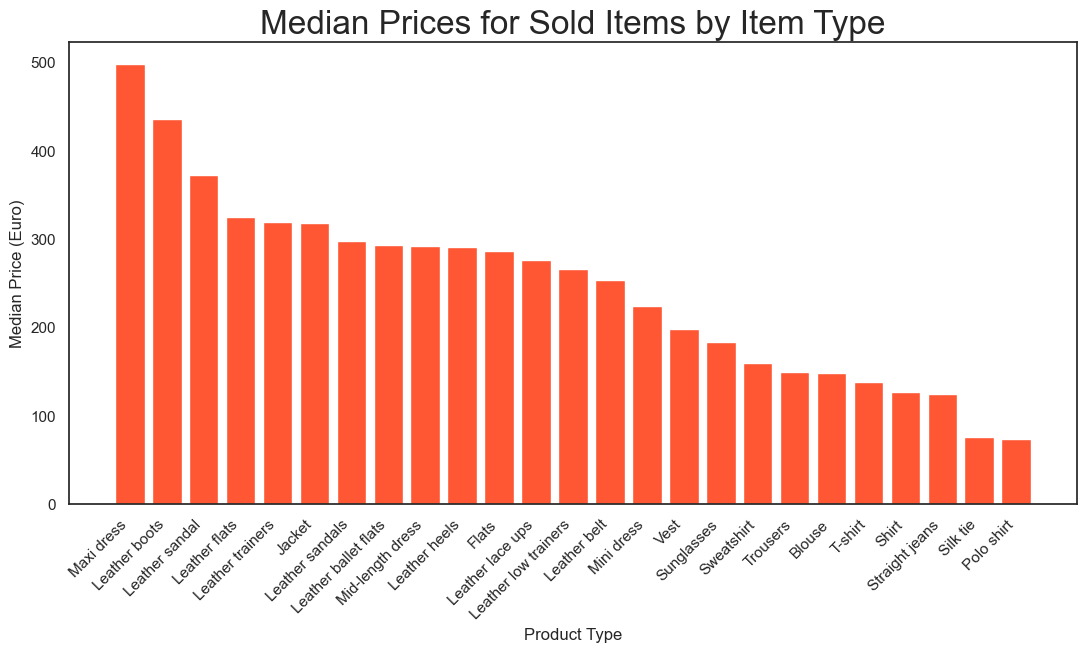

In [167]:
item_price = vestiaire_data_bvp1.groupby(['product_type'])['seller_price'].median().reset_index()
item_price = item_price.sort_values(by='seller_price', ascending=False)

fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(item_price['product_type'], item_price['seller_price'], color='#FF5733')
ax.set_title('Median Prices for Sold Items by Item Type', fontsize=24)
ax.set_xlabel('Product Type')
ax.set_ylabel('Median Price (Euro)')

plt.xticks(rotation=45, ha='right')

plt.show()


In [168]:
item_price.head(25)

,product_type,seller_price
13,Maxi dress,498.205
5,Leather boots,436.480
10,Leather sandal,372.750
6,Leather flats,325.945
12,Leather trainers,319.500
2,Jacket,318.440
11,Leather sandals,298.800
3,Leather ballet flats,293.220
14,Mid-length dress,292.850
7,Leather heels,291.660


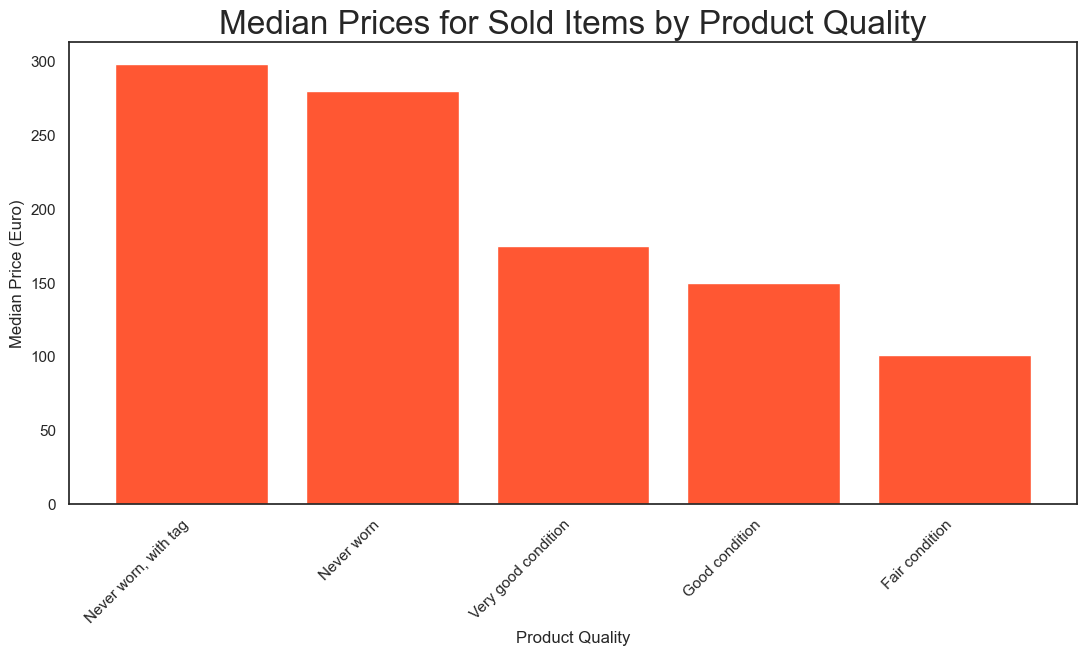

In [169]:
quality_price = vestiaire_data_bvp1.groupby(['product_condition'])['seller_price'].median().reset_index()
quality_price = quality_price.sort_values(by='seller_price', ascending=False)

fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(quality_price['product_condition'], quality_price['seller_price'], color='#FF5733')
ax.set_title('Median Prices for Sold Items by Product Quality', fontsize=24)
ax.set_xlabel('Product Quality')
ax.set_ylabel('Median Price (Euro)')

plt.xticks(rotation=45, ha='right')

plt.show()

In [170]:
quality_price.head()

,product_condition,seller_price
3,"Never worn, with tag",298.20
2,Never worn,280.00
4,Very good condition,175.00
1,Good condition,150.00
0,Fair condition,101.18


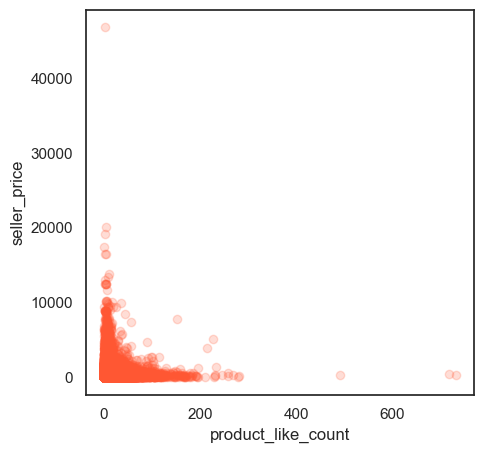

In [171]:
#I wanted to see the like count to price -- to gauge customer interest, but the outliers disrupt the interpretation
vc = vestiaire_data_bvp1.loc[vestiaire_data_bvp1["product_like_count"] != 0, :]

vc[["product_like_count", "seller_price"]].corr()

plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(vestiaire_data_bvp1["product_like_count"], vestiaire_data_bvp1["seller_price"], color='#FF5733', alpha=0.20)
ax.set_xlabel('product_like_count')
ax.set_ylabel('seller_price') 
plt.show()

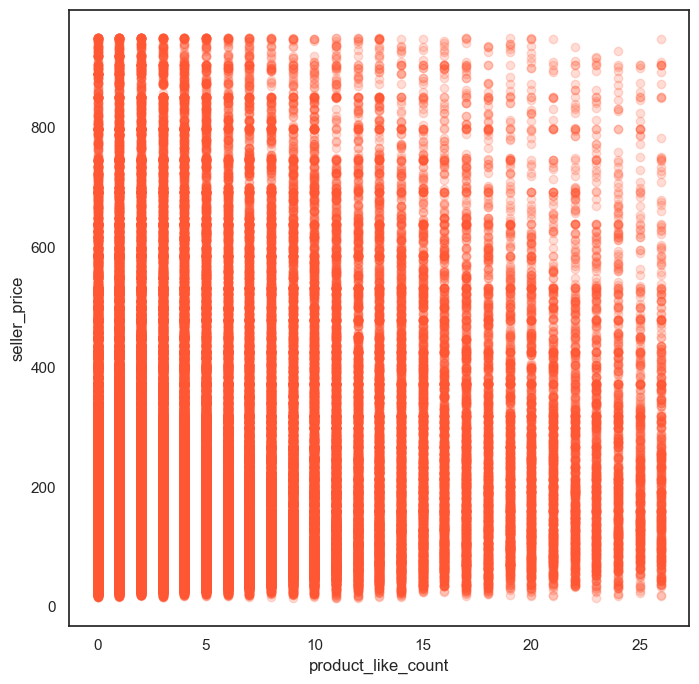

In [172]:
# used strategy from: https://stackoverflow.com/questions/71106128/remove-outlier-using-quantile-python
like_count = vestiaire_data_bvp1['product_like_count'].quantile(0.95)
price = vestiaire_data_bvp1['seller_price'].quantile(0.95)

narrowed_data = vestiaire_data_bvp1[
    (vestiaire_data_bvp1['product_like_count'] <= like_count) & 
    (vestiaire_data_bvp1['seller_price'] <= price)
]

plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.scatter(narrowed_data["product_like_count"], narrowed_data["seller_price"], color='#FF5733', alpha=0.20)
ax.set_xlabel('product_like_count')
ax.set_ylabel('seller_price')
plt.show()


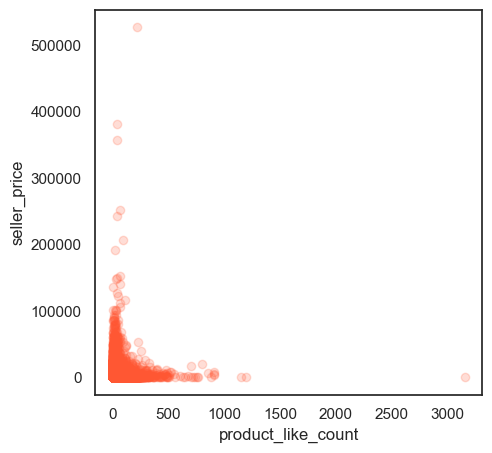

In [173]:
#This is of all products listed, mostly for visual emphasis -- to show what vestiaire offers vs what is actually bought
vc = vestiaire_data.loc[vestiaire_data["product_like_count"] != 0, :]

vc[["product_like_count", "seller_price"]].corr()

plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(vestiaire_data["product_like_count"], vestiaire_data["seller_price"], color='#FF5733', alpha=0.20)
ax.set_xlabel('product_like_count')
ax.set_ylabel('seller_price') 
plt.show()

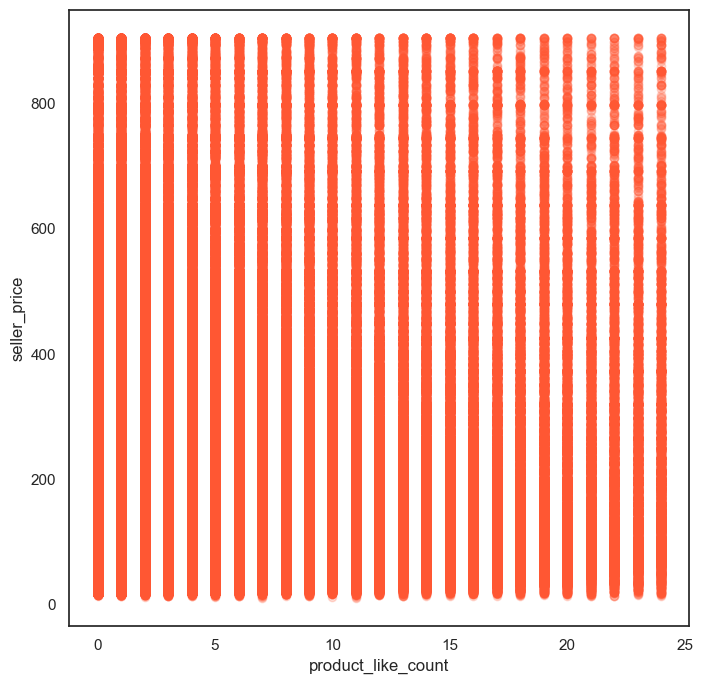

In [174]:
like_count = vestiaire_data['product_like_count'].quantile(0.95)
price = vestiaire_data['seller_price'].quantile(0.95)

narrowed_data = vestiaire_data[
    (vestiaire_data['product_like_count'] <= like_count) & 
    (vestiaire_data['seller_price'] <= price)
]

plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.scatter(narrowed_data["product_like_count"], narrowed_data["seller_price"], color='#FF5733', alpha=0.20)
ax.set_xlabel('product_like_count')
ax.set_ylabel('seller_price')
plt.show()

In [175]:
#SLP 3: Machine Learning Application

In [176]:
#Now we know what companies, product, material, and quality are preferred by customers
#Now, I need to make a model that predicts how likely a product is to be sold based on customer preferences
#This ML application will show that my previous analysis is correct in its results

In [177]:
#Due to the size of my df, I will be narrowing down the data, and relying on top_25 opposed to making 
#individual boolean columns for each brand name, product name, etc.
#Step 1: Cleaning and prepping the new df

In [178]:
vestiaire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_type        900514 non-null  object 
 1   product_category    899331 non-null  object 
 2   product_condition   900514 non-null  object 
 3   product_like_count  900514 non-null  float64
 4   sold                900514 non-null  int64  
 5   brand_id            900514 non-null  int64  
 6   brand_name          900514 non-null  object 
 7   product_material    900510 non-null  object 
 8   seller_price        900514 non-null  float64
 9   buyers_fees         886778 non-null  float64
 10  top_25_brand        900514 non-null  int64  
 11  top_25_products     900514 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 82.4+ MB


In [179]:
#Most sold price is 
lp_data = vestiaire_data[vestiaire_data['sold'] == 1]
price_count = sold_products['seller_price'].value_counts()
most_popular_price = price_count.idxmax()
print(most_popular_price)

149.3


In [180]:
#Now we know what price range is ideal for the custoemr base, and sells the most 
lower_bound = 0
upper_bound = 200

filtered = vestiaire_data[(vestiaire_data['seller_price'] >= lower_bound) & (vestiaire_data['seller_price'] <= upper_bound)]

filtered.head()

,product_type,product_category,product_condition,product_like_count,sold,brand_id,brand_name,product_material,seller_price,buyers_fees,top_25_brand,top_25_products
1,Jacket,Women Clothing,Very good condition,1.0,0,161,Barbara Bui,Cotton,106.50,21.30,0,1
3,Mini skirt,Women Clothing,Very good condition,0.0,0,2797,MSGM,Polyester,149.00,14.90,0,0
4,Vegan leather trousers,Women Clothing,Very good condition,1.0,0,11956,LVIR,Vegan leather,99.77,19.95,0,0
5,Mid-length dress,Women Clothing,Very good condition,0.0,0,80,See by Chloé,Cotton - elasthane,90.53,18.11,0,1
6,Silk trousers,Women Clothing,Never worn,1.0,0,518,Just Cavalli,Silk,40.47,8.09,0,0


In [181]:
#narrows row count
rowcount = len(filtered)
print(rowcount)

558902


In [182]:
#using OneHotEncoder to convert my object columns into integers: 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_converted = ['product_condition']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(filtered[columns_converted])

encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(columns_converted),
    index=filtered.index
)

filtered = pd.concat(
    [filtered.drop(columns=columns_converted), encoded_df],
    axis=1
)

In [183]:
#now I can use machine learning techniques
vestiaire_ML = filtered.fillna(0)
sold_materials = vestiaire_data[vestiaire_data['sold'] == 1]
material_counts = sold_materials['product_material'].value_counts()
top_25_materials = material_counts.nlargest(25)
print(top_25_materials)

product_material
Leather               3971
Cotton                2841
Polyester              829
Silk                   810
Wool                   803
Cloth                  658
Suede                  548
Viscose                374
Plastic                327
Patent leather         304
Polyamide              235
Denim - Jeans          232
Synthetic              207
Rubber                 202
Cashmere               188
Linen                  168
Metal                  155
Cotton - elasthane     152
Steel                  123
Velvet                  88
Glitter                 80
Tweed                   59
Vegan leather           43
Lycra                   34
Lace                    31
Name: count, dtype: int64


In [184]:
top_25_materials = ['Leather', 'Cotton', 'Polyester', 'Silk', 'Wool', 'Cloth',
                 'Suede', 'Viscose', 'Plastic', 'Patent leather',
                 'Polyamide', 'Denim - Jeans', 'Synthetic', 'Rubber',
                 'Cashmere', 'Linen', 'Metal', 'Cotton - elasthane', 'Steel',
                 'Velvet', 'Glitter', 'Tweed', 'Vegan leather', 'Lycra',
                 'Lace']

filtered['top_25_materials'] = filtered['brand_name'].isin(top_25_brands).astype(int)
filtered = filtered.drop(['brand_name','product_category','product_material', 'product_type'], axis=1)

In [185]:
counts = filtered['sold'].value_counts()
print(counts)

sold
0    549487
1      9415
Name: count, dtype: int64


In [186]:
filtered.head()

,product_like_count,sold,brand_id,seller_price,buyers_fees,top_25_brand,top_25_products,product_condition_Good condition,product_condition_Never worn,"product_condition_Never worn, with tag",product_condition_Very good condition,top_25_materials
1,1.0,0,161,106.50,21.30,0,1,0.0,0.0,0.0,1.0,0
3,0.0,0,2797,149.00,14.90,0,0,0.0,0.0,0.0,1.0,0
4,1.0,0,11956,99.77,19.95,0,0,0.0,0.0,0.0,1.0,0
5,0.0,0,80,90.53,18.11,0,1,0.0,0.0,0.0,1.0,0
6,1.0,0,518,40.47,8.09,0,0,0.0,1.0,0.0,0.0,0


In [ ]:
#2: ML Application: Supervised - Logistic Regression and Decicion Tree

In [187]:
#Since my data is labeled and not uncalssified/unlabeled, I will be using Supervised learning
#need to set aside test data 
#Throughout my SLP3 I only got 0 answers, after some consideration, I realized this is due to the heavy 
#imbalance in my data. I wasn't sure how to navigate this problem, and after researching my options, I 
#decided to oversample the sold = 1.0 class  
#https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de

In [188]:
#BEFORE I had to downsample--to show the problems I was facing
#Used class 09 notes
from sklearn.model_selection import train_test_split
filtered = filtered.fillna(0)
indep_vars = [i for i in filtered.columns if i != 'sold']
dep_var = 'sold'
X = filtered[indep_vars]
y = filtered[dep_var]

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size= 0.2,
   random_state=0)

In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.99246736342064
0.992360061191079


In [190]:
#BEFORE I downsampled:
pred[0:5]

array([2.49616173e-039, 9.99948605e-001, 9.19359774e-001, 3.01258351e-237,
       9.99209006e-001])

In [191]:
#https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
#resampling technique from: https://mne.discourse.group/t/mne-resample-different-values-in-downsampling/5920/3
#https://www.projectpro.io/recipes/deal-with-imbalance-classes-with-downsampling-in-python
#https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de
from imblearn.over_sampling import SMOTE


X = filtered.drop(columns=['sold']) 
y = filtered['sold']  # Target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

filtered = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['sold'])], axis=1)

print(filtered['sold'].value_counts())


sold
0    549487
1    549487
Name: count, dtype: int64


In [192]:
from sklearn.model_selection import train_test_split

X = balanced_data.drop(columns=['sold'])  
y = balanced_data['sold']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9916160417844375
0.9919151937032235


In [194]:
pred = model.predict_proba(X_test)
pred = np.array([i[1] for i in pred])

In [195]:
y_train.value_counts()

sold
0    439660
1    439519
Name: count, dtype: int64

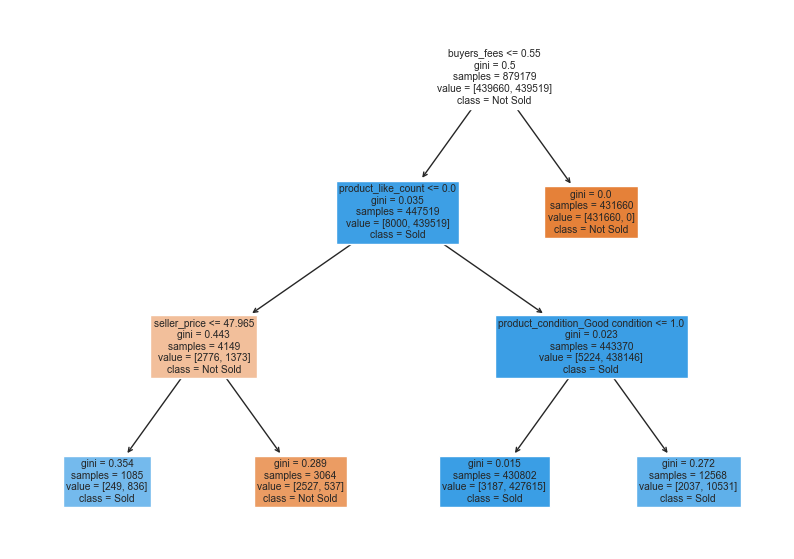

In [196]:
#For the decision tree--using the strategy from Class 9 Notes
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=X_train.columns, class_names=["Not Sold", "Sold"], filled=True)
plt.show()

In [197]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9931640769399633
0.993557633249164


In [198]:
preds = model.predict_proba(X_test)
preds = np.array([i[1] for i in preds])

In [199]:
preds[0:5]

array([0.        , 0.99260217, 0.83792171, 0.        , 0.99260217])

/var/folders/pp/1wh3wkgd2hd1jwy4zjy_pzch0000gn/T/ipykernel_23259/1049504424.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds[y_test==0], hist=False, kde=True, label="Not Sold")
/var/folders/pp/1wh3wkgd2hd1jwy4zjy_pzch0000gn/T/ipykernel_23259/1049504424.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

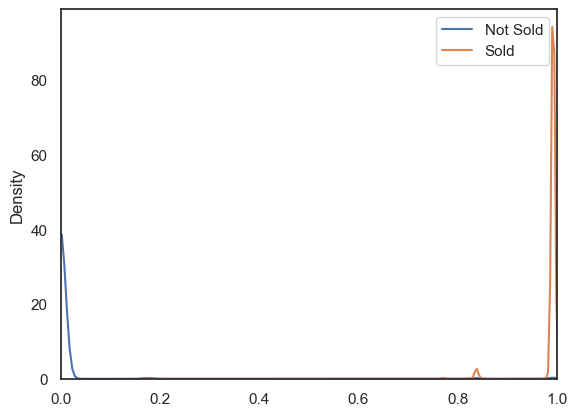

In [200]:
import seaborn as sns

sns.distplot(preds[y_test==0], hist=False, kde=True, label="Not Sold")
sns.distplot(preds[y_test==1], hist=False, kde=True, label="Sold")
plt.legend()
plt.xlim(0, 1)
plt.show()

In [201]:
#shows a bias towards sold, from downsampling the data